<a href="https://colab.research.google.com/github/Bishal-Nengminja/Deep-Learning-Cat-Dog-Classifier/blob/main/Deep_Learning_Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Face Mask Dataset**

In [1]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [2]:
# extracting the compessed Dataset
from zipfile import ZipFile
file_name = "/content/train.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("The dataset is extrated")

The dataset is extrated


In [3]:
!ls

dogs-vs-cats.zip  sampleSubmission.csv	train
sample_data	  test1.zip		train.zip


**2. Importing the Dependencies**

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

import os
import cv2
import glob
import tensorflow as tf
import tensorflow_hub as hub

**3. Displaying the images of dogs and cats**

In [5]:
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [6]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.2460.jpg', 'cat.9313.jpg', 'cat.12029.jpg', 'cat.10568.jpg', 'cat.8243.jpg', 'dog.7167.jpg', 'dog.9676.jpg', 'cat.8703.jpg', 'dog.2800.jpg', 'cat.6885.jpg', 'dog.4488.jpg', 'dog.3088.jpg', 'cat.4194.jpg', 'cat.7801.jpg', 'cat.2515.jpg', 'cat.479.jpg', 'cat.688.jpg', 'dog.11835.jpg', 'cat.11208.jpg', 'dog.8244.jpg', 'dog.7563.jpg', 'cat.10976.jpg', 'dog.3476.jpg', 'dog.7419.jpg', 'cat.5052.jpg', 'cat.79.jpg', 'dog.2502.jpg', 'dog.3990.jpg', 'cat.6766.jpg', 'dog.11212.jpg', 'cat.3596.jpg', 'dog.7546.jpg', 'cat.1192.jpg', 'dog.10408.jpg', 'dog.4131.jpg', 'dog.8658.jpg', 'cat.2521.jpg', 'cat.914.jpg', 'dog.4612.jpg', 'cat.5559.jpg', 'cat.1711.jpg', 'cat.11497.jpg', 'cat.8716.jpg', 'dog.1484.jpg', 'cat.12434.jpg', 'dog.10953.jpg', 'dog.2813.jpg', 'dog.3437.jpg', 'cat.8224.jpg', 'dog.9251.jpg', 'cat.1718.jpg', 'dog.3247.jpg', 'dog.10728.jpg', 'cat.8147.jpg', 'dog.6530.jpg', 'cat.4883.jpg', 'dog.6798.jpg', 'dog.11003.jpg', 'dog.903.jpg', 'cat.8315.jpg', 'cat.6374.jpg', 'dog.12103.jpg', 

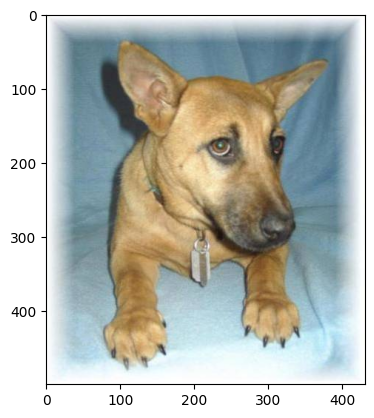

In [26]:
# display dog image
img = mpimg.imread('/content/train/dog.9893.jpg')
imgplt = plt.imshow(img)
plt.show()

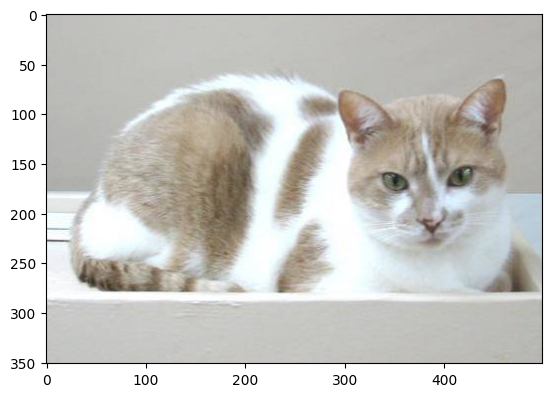

In [27]:
# display cat image
img = mpimg.imread('/content/train/cat.12029.jpg')
imgplt = plt.imshow(img)
plt.show()

In [9]:
file_names = os.listdir('/content/train/')

for i in range(8):

  name = file_names[i]
  print(name[0:3])

dog
cat
cat
cat
cat
dog
dog
cat


In [10]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


**4. Resizing all the images**

In [11]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [12]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [13]:
file_names2 = os.listdir('/content/image resized/')
print(file_names2)

['dog.2460.jpg', 'cat.9313.jpg', 'cat.12029.jpg', 'cat.10568.jpg', 'cat.8243.jpg', 'dog.7167.jpg', 'dog.9676.jpg', 'cat.8703.jpg', 'dog.2800.jpg', 'cat.6885.jpg', 'dog.4488.jpg', 'dog.3088.jpg', 'cat.4194.jpg', 'cat.7801.jpg', 'cat.2515.jpg', 'cat.479.jpg', 'cat.688.jpg', 'dog.11835.jpg', 'cat.11208.jpg', 'dog.8244.jpg', 'dog.7563.jpg', 'cat.10976.jpg', 'dog.3476.jpg', 'dog.7419.jpg', 'cat.5052.jpg', 'cat.79.jpg', 'dog.2502.jpg', 'dog.3990.jpg', 'cat.6766.jpg', 'dog.11212.jpg', 'cat.3596.jpg', 'dog.7546.jpg', 'cat.1192.jpg', 'dog.10408.jpg', 'dog.4131.jpg', 'dog.8658.jpg', 'cat.2521.jpg', 'cat.914.jpg', 'dog.4612.jpg', 'cat.5559.jpg', 'cat.1711.jpg', 'cat.11497.jpg', 'cat.8716.jpg', 'dog.1484.jpg', 'cat.12434.jpg', 'dog.10953.jpg', 'dog.2813.jpg', 'dog.3437.jpg', 'cat.8224.jpg', 'dog.9251.jpg', 'cat.1718.jpg', 'dog.3247.jpg', 'dog.10728.jpg', 'cat.8147.jpg', 'dog.6530.jpg', 'cat.4883.jpg', 'dog.6798.jpg', 'dog.11003.jpg', 'dog.903.jpg', 'cat.8315.jpg', 'cat.6374.jpg', 'dog.12103.jpg', 

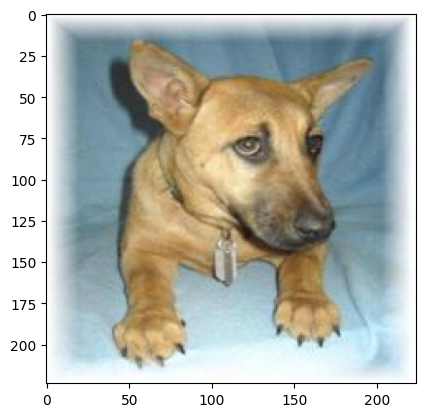

In [25]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.9893.jpg')
imgplt = plt.imshow(img)
plt.show()

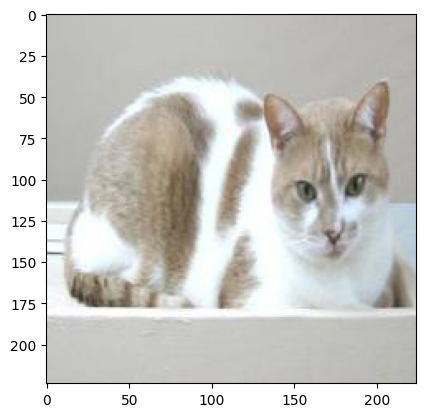

In [20]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.12029.jpg')
imgplt = plt.imshow(img)
plt.show()

**5. Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [28]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [29]:
print(filenames[0:5])
print(len(filenames))

['dog.2460.jpg', 'cat.9313.jpg', 'cat.12029.jpg', 'cat.10568.jpg', 'cat.8243.jpg']
2000


In [30]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 0]
2000


In [31]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 988 1012]


**6. Converting all the resized images to numpy arrays**

In [32]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [33]:
print(dog_cat_images)

[[[[126 193 154]
   [126 193 154]
   [126 193 154]
   ...
   [134 185 171]
   [135 189 172]
   [133 187 170]]

  [[113 180 143]
   [100 167 130]
   [ 94 161 124]
   ...
   [126 179 165]
   [127 180 166]
   [131 185 168]]

  [[114 181 149]
   [ 97 164 132]
   [ 88 155 124]
   ...
   [124 177 163]
   [121 174 160]
   [127 182 167]]

  ...

  [[149 198 178]
   [150 199 179]
   [146 194 176]
   ...
   [133 179 166]
   [128 172 159]
   [ 90 135 119]]

  [[145 190 173]
   [142 187 170]
   [151 196 179]
   ...
   [129 173 160]
   [132 175 162]
   [ 92 135 122]]

  [[147 192 175]
   [141 186 169]
   [158 203 186]
   ...
   [142 185 174]
   [169 212 199]
   [140 183 170]]]


 [[[139 155 168]
   [139 155 168]
   [138 154 167]
   ...
   [113 124 132]
   [113 124 132]
   [113 124 132]]

  [[154 167 181]
   [153 167 179]
   [152 165 179]
   ...
   [115 126 134]
   [115 126 134]
   [115 126 134]]

  [[170 182 194]
   [169 181 191]
   [168 180 192]
   ...
   [117 128 136]
   [117 128 136]
   [117 128

In [34]:
type(dog_cat_images)

numpy.ndarray

In [35]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [36]:
X = dog_cat_images
Y = np.asarray(labels)

**7. Train Test Split**

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [39]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [40]:
print(X_train_scaled)

[[[[0.74901961 0.78431373 0.81960784]
   [0.75294118 0.79607843 0.82745098]
   [0.76078431 0.80392157 0.83529412]
   ...
   [0.82745098 0.87843137 0.88627451]
   [0.80392157 0.85490196 0.8627451 ]
   [0.78823529 0.83921569 0.84705882]]

  [[0.71372549 0.74117647 0.77647059]
   [0.7254902  0.76078431 0.79607843]
   [0.74117647 0.78431373 0.81568627]
   ...
   [0.84705882 0.89803922 0.90588235]
   [0.8        0.85098039 0.85882353]
   [0.76078431 0.81176471 0.81960784]]

  [[0.79607843 0.81960784 0.84705882]
   [0.78431373 0.81568627 0.84313725]
   [0.76470588 0.80392157 0.83137255]
   ...
   [0.73333333 0.78431373 0.79215686]
   [0.81176471 0.8627451  0.87058824]
   [0.85882353 0.90980392 0.91764706]]

  ...

  [[0.82352941 0.87843137 0.8627451 ]
   [0.83137255 0.88627451 0.87058824]
   [0.83921569 0.89411765 0.87843137]
   ...
   [0.78431373 0.84705882 0.8745098 ]
   [0.78039216 0.84313725 0.87058824]
   [0.77254902 0.83529412 0.8627451 ]]

  [[0.8        0.85490196 0.83137255]
   [0.8

**8. Building the Neural Network**

In [41]:
# Model definition
pretrained_model_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

class HubLayer(tf.keras.layers.Layer):
    def __init__(self, handle, trainable=False, **kwargs):
        super().__init__(**kwargs)
        self.handle = handle
        self.trainable = trainable
        self.hub_layer = None  # Initialize hub_layer as None

    def build(self, input_shape):
        # Create the KerasLayer inside the build method
        self.hub_layer = hub.KerasLayer(self.handle, trainable=self.trainable)
        super().build(input_shape)

    def call(self, inputs):
        return self.hub_layer(inputs)

    def get_config(self):
        config = super().get_config()
        config.update({
            'handle': self.handle,
            'trainable': self.trainable,
        })
        return config

# Use the custom lyaer in the  Sequential Model
num_of_classes = 2

model = tf.keras.Sequential([
    HubLayer(pretrained_model_url, trainable=False),
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

model.summary()
print("Model created successfully!")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hub_layer (HubLayer)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model created successfully!


In [42]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [43]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - acc: 0.8356 - loss: 0.3845
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - acc: 0.9761 - loss: 0.0807
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - acc: 0.9881 - loss: 0.0540
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - acc: 0.9872 - loss: 0.0394
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - acc: 0.9829 - loss: 0.0507


In [44]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - acc: 0.9821 - loss: 0.0563
Test Loss = 0.05479389801621437
Test Accuracy = 0.9775000214576721


**9. Predictive System**

Path of the image to be predicted: /content/image resized/dog.10084.jpg


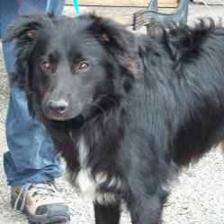

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
[[0.00514332 0.9948567 ]]
1
The image represents a Dog


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Check if the image was loaded successfully
if input_image is None:
    print(f"Error: Could not load image from {input_image_path}. Please check the path.")
else:
    cv2_imshow(input_image)
    input_image_resize = cv2.resize(input_image, (224,224))
    input_image_scaled = input_image_resize/255
    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
    input_prediction = model.predict(image_reshaped)
    print(input_prediction)
    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)
    if input_pred_label == 0:
      print('The image represents a Cat')
    else:
      print('The image represents a Dog')